# ВВП
<br>
**Источник:** <br>https://datacatalog.worldbank.org/
<br>
<br>
**Цели:** <br>● провести предобработку данных, для последующего их удобного анализа
<br>
● проанализировать данные в соответсвии с имеющимися задачами
<br>
<br>
**Задачи:** <br>● Найти страны с минимальным, максимальным ВВП за 2020 год и медианное значение.
<br>
● Выбрать по 3 страны из стран 1 мира, 2 мира и 3 мира. Построить линейную диаграмму, отражающую изменения ВВП этих стран с 2000 по 2020 годы.
<br>
● Построить столбчатую диаграмму для сравнения значения ВВП на душу населения в Великобритании, Японии, Канаде и России за 2015-2020 гг.
<br>
● Построить круговую диаграмму соотношения численности населения государств Южной Америки по данным на 2020 год
<br>
<br>
**Входные данные:** <br>входные данные представляют собой файл csv, содержащий в себе информацию о кредиторах и их некоторых параметрах
<br>
<br>
**Используемые библиотеки:** <br>pandas
<br>numpy
<br>matplotlib.pyplot
<br>
<br>
Для начала импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Обзор данных

Считаем файл и отформатируем, запишем его в переменную **df**. 

In [2]:
df = pd.read_csv("data_25_08_2021_worldbank.csv")
pd.options.display.float_format ='{:.3f}'.format

Выведем основную информацию о данных:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    532 non-null    object 
 1   Country Code    532 non-null    object 
 2   Indicator Name  532 non-null    object 
 3   Indicator Code  532 non-null    object 
 4   1960            397 non-null    float64
 5   1961            398 non-null    float64
 6   1962            401 non-null    float64
 7   1963            401 non-null    float64
 8   1964            401 non-null    float64
 9   1965            410 non-null    float64
 10  1966            414 non-null    float64
 11  1967            418 non-null    float64
 12  1968            422 non-null    float64
 13  1969            422 non-null    float64
 14  1970            430 non-null    float64
 15  1971            432 non-null    float64
 16  1972            432 non-null    float64
 17  1973            432 non-null    flo

Данные представляют собой 65 стобцов и 532 строки. Все столбцы кроме первых 4 и последнего имеют тип **float**, что соответсвует данным, хранящимися в таблице Посмортирм, как выглядят наши данные:

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.450,146.854,156.018,182.044,162.170,180.017,...,1667.993,1648.868,1654.315,1503.859,1401.281,1536.207,1530.162,1481.425,1326.664,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.000,134159786.000,137614644.000,141202036.000,144920186.000,148769974.000,...,547482863.000,562601578.000,578075373.000,593871847.000,609978946.000,626392880.000,643090131.000,660046272.000,677243299.000,NaN
2,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.964,113.115,118.866,123.479,131.893,138.567,...,1936.391,2123.392,2166.743,1886.248,1666.422,1606.978,1695.959,1772.339,1714.427,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.000,98407221.000,100506960.000,102691339.000,104953470.000,107289875.000,...,370243017.000,380437896.000,390882979.000,401586651.000,412551299.000,423769930.000,435229381.000,446911598.000,458803476.000,NaN
4,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7455.042,7505.174,7436.580,6346.032,6093.331,6095.663,6568.984,6570.174,5802.104,NaN


Можно заметить, что данные содержат название страны, код страны, показатель "Indicator Name", который показывает какая информация хранится в данной строке ВВП страны или численность населения. Потом идет "Indicator Code", который дублирует эти данные. После этого идут столбцы с 1960 до 2020. 

## Предобработка данных
Заметим также, что заголовки столбцов не приведены в **"snake_case"**. Исправим это:

In [5]:
df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', "").str.lower()
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

/var/folders/rt/mvnmln8j70d9fmnh5b6pl1qr0000gn/T/ipykernel_11443/469356610.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', "").str.lower()


Index(['country_name', 'country_code', 'indicator_name', 'indicator_code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'unnamed:_65'],
      dtype='object')

Удалим лишние столбцы. Нам не нужны те, которые дублируют данные или попросту их не содержат:
<br>
● country_code
<br>
● indicator_code
<br>
● unnamed:_65

In [6]:
df = df.drop(["country_code"], axis=1)
df = df.drop(["unnamed:_65"], axis=1)
df = df.drop(["indicator_code"], axis=1)

Если посмотреть на поставленные задачи, то можно заметить, что нам нужны только данные в период с 2000 до 2020 года. Значит все остальные стобики с другими годами модно удалить:

In [7]:
a = [int(i) for i in range(2, 42)]
df = df.drop(df.columns[a], axis=1)
df.head()

,country_name,indicator_name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,GDP per capita (current US$),672.205,591.088,589.207,757.450,916.603,1037.727,1142.956,1278.971,...,1682.287,1667.993,1648.868,1654.315,1503.859,1401.281,1536.207,1530.162,1481.425,1326.664
1,Africa Eastern and Southern,"Population, total",398113044.000,408522129.000,419223717.000,430246635.000,441630149.000,453404076.000,465581372.000,478166911.000,...,532760424.000,547482863.000,562601578.000,578075373.000,593871847.000,609978946.000,626392880.000,643090131.000,660046272.000,677243299.000
2,Africa Western and Central,GDP per capita (current US$),502.032,516.928,605.061,681.882,826.817,988.839,1224.058,1400.086,...,1827.518,1936.391,2123.392,2166.743,1886.248,1666.422,1606.978,1695.959,1772.339,1714.427
3,Africa Western and Central,"Population, total",267214544.000,274433894.000,281842480.000,289469530.000,297353098.000,305520588.000,313985474.000,322741656.000,...,360285439.000,370243017.000,380437896.000,390882979.000,401586651.000,412551299.000,423769930.000,435229381.000,446911598.000,458803476.000
4,Arab World,GDP per capita (current US$),2678.315,2536.786,2484.845,2696.047,3134.872,3765.927,4360.064,4963.700,...,6870.099,7455.042,7505.174,7436.580,6346.032,6093.331,6095.663,6568.984,6570.174,5802.104


Проверим на пропуски:

In [8]:
df.isna().mean()

country_name     0.000
indicator_name   0.000
2000             0.036
2001             0.036
2002             0.026
2003             0.026
2004             0.026
2005             0.026
2006             0.024
2007             0.024
2008             0.026
2009             0.026
2010             0.024
2011             0.021
2012             0.024
2013             0.023
2014             0.023
2015             0.024
2016             0.026
2017             0.026
2018             0.026
2019             0.039
2020             0.085
dtype: float64

Заменим пропуски на 0, т.к. заменить исзодя из каких-то параметров не получится - слишком большой разброс данных и не понятно, можно ли проследить какую-то закономерность. 

In [9]:
df = df.fillna(0)
df.isna().mean()

country_name     0.000
indicator_name   0.000
2000             0.000
2001             0.000
2002             0.000
2003             0.000
2004             0.000
2005             0.000
2006             0.000
2007             0.000
2008             0.000
2009             0.000
2010             0.000
2011             0.000
2012             0.000
2013             0.000
2014             0.000
2015             0.000
2016             0.000
2017             0.000
2018             0.000
2019             0.000
2020             0.000
dtype: float64

Теперь пропусков нет. Поймем, что таблица устроена следующим образом: для одной страны есть 2 строчки, в одной отражается ВВП за все года, а в другой - численность населения. Разобьем нашу таблицу на 2. В одной отразим популяцию, а в другой ВВП:

In [10]:
df1 = df.iloc[::2]
df_1 = df.iloc[1::2]
df_1.head(10)

,country_name,indicator_name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,"Population, total",398113044.000,408522129.000,419223717.000,430246635.000,441630149.000,453404076.000,465581372.000,478166911.000,...,532760424.000,547482863.000,562601578.000,578075373.000,593871847.000,609978946.000,626392880.000,643090131.000,660046272.000,677243299.000
3,Africa Western and Central,"Population, total",267214544.000,274433894.000,281842480.000,289469530.000,297353098.000,305520588.000,313985474.000,322741656.000,...,360285439.000,370243017.000,380437896.000,390882979.000,401586651.000,412551299.000,423769930.000,435229381.000,446911598.000,458803476.000
5,Arab World,"Population, total",282344141.000,288432153.000,294665202.000,301113869.000,307862846.000,314965776.000,322452764.000,330290752.000,...,363156846.000,371437642.000,379696477.000,387899835.000,396028301.000,404042892.000,411942825.000,419851989.000,427870273.000,436080728.000
7,Caribbean small states,"Population, total",6513486.000,6559097.000,6604966.000,6650981.000,6696985.000,6742657.000,6788122.000,6833394.000,...,7022367.000,7072640.000,7123315.000,7173443.000,7222197.000,7269385.000,7314956.000,7358929.000,7401389.000,7442291.000
9,Central Europe and the Baltics,"Population, total",108447824.000,107660041.000,106959751.000,106624167.000,106331716.000,106041911.000,105772481.000,105378748.000,...,104174038.000,103935318.000,103713726.000,103496179.000,103257886.000,102994278.000,102740078.000,102538451.000,102398537.000,102246330.000
11,Early-demographic dividend,"Population, total",2472852816.000,2516662185.000,2560101448.000,2603300762.000,2646483605.000,2689792006.000,2733278857.000,2776922505.000,...,2951423688.000,2994346938.000,3037084158.000,3079685581.000,3122156833.000,3164439749.000,3206485623.000,3248413593.000,3290291029.000,3332105361.000
13,East Asia & Pacific,"Population, total",2047640091.000,2065912033.000,2083186086.000,2099602481.000,2115458625.000,2131146847.000,2146744105.000,2161785511.000,...,2221672723.000,2236817711.000,2252044491.000,2267485985.000,2282863725.000,2298500738.000,2314112848.000,2328193462.000,2340673749.000,2352037717.000
15,East Asia & Pacific (excluding high income),"Population, total",1816455800.000,1833422980.000,1849607527.000,1865132738.000,1880248912.000,1895275475.000,1909891482.000,1924018171.000,...,1980035204.000,1994389913.000,2008919318.000,2023595907.000,2038190024.000,2053107304.000,2068150870.000,2081650327.000,2093675075.000,2105003391.000
17,East Asia & Pacific (IDA & IBRD countries),"Population, total",1793498345.000,1810261111.000,1826238741.000,1841560611.000,1856486255.000,1871341383.000,1885806879.000,1899800479.000,...,1955333874.000,1969561377.000,1983961912.000,1998510237.000,2012978425.000,2027772092.000,2042693823.000,2056073849.000,2067982370.000,2079198305.000
19,Euro area,"Population, total",321310789.000,322547874.000,324125339.000,325885957.000,327682513.000,329380417.000,330922785.000,332645162.000,...,335419656.000,336159199.000,337302111.000,338462234.000,339488382.000,340481755.000,341217243.000,341979171.000,342282081.000,342949773.000


Проверим, что мы не ошиблись и дейтсивтельно во всей таблице строки с ВВП и численностью населения чередуются:

In [11]:
df1["indicator_name"].value_counts()

GDP per capita (current US$)    266
Name: indicator_name, dtype: int64

In [12]:
df_1["indicator_name"].value_counts()

Population, total    266
Name: indicator_name, dtype: int64

В каждой из новых таблиц содержиться что-то одно: или численность населения, или ВВП, все верно.

## Найти страны с минимальным, максимальным ВВП за 2020 год и медианное значение.
Создадим новую таблицу, в которую запишем значения ВВП за 2000 год по всем странам:

In [13]:
df2 = pd.pivot_table(df1,
               index = ["country_name"],
               values = ["2000"])

df2.columns = ["year"]
df2.head()

,year
country_name,
Afghanistan,0.000
Africa Eastern and Southern,672.205
Africa Western and Central,502.032
Albania,1126.683
Algeria,1765.027


Найдем максимальное значение:

In [14]:
df2["year"].max()

82365.492364536

Найдем минималное значение. Предварительно удалим данные, где показатель ВВП за 2000 год равняется 0, чтобы вывести реальный минимум, а не 0:

In [15]:
df2 = df2.query('year != 0')
df2["year"].min()

99.7449195857043

Найдем медианное значение:

In [16]:
df2["year"].median()

1820.68445462577

## Выбрать по 3 страны из стран 1 мира, 2 мира и 3 мира. Построить линейную диаграмму, отражающую изменения ВВП этих стран с 2000 по 2020 годы.
Я выбрала следующие страны, используя источник https://www.prostudenta.ru/article-4640.html?ysclid=l8u37gv0fc545547274:
<br>
1 мир
<br>
● Canada
<br>
● United Kingdom
<br>
● Japan
<br>
<br>
2 мир
<br>
● Russian Federation
<br>
● Serbia
<br>
● Bulgaria
<br>
<br>
3 мир
<br>
● Tajikistan
<br>
● Uzbekistan
<br>
● Pakistan

Создадим таблицу, в которой содержаться данные по Канаде

In [17]:
a = "Canada"
df_a = df1.query("country_name == @a")

Выкинем лишние столбцы и заменим индекс строки для дальнейшего удобства:

In [18]:
df_a  = df_a.drop(df.columns[[0, 1, 2]], axis=1)
df_a.index = [1]
df_a.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,23822.060,24255.339,28300.463,32143.681,36382.508,40504.061,44659.895,46710.506,40876.310,47562.083,52223.696,52669.090,52635.175,50955.998,43596.136,42315.604,45129.356,46454.743,46326.673,43241.618


Создадим новую таблицу, в стобик **"count"** запишем данные ВВП по годам:

In [19]:
df_a1 = pd.DataFrame()
lst_a = df_a.loc[1]
df_a1["count"] = lst_a

В стобик **"year"** запишем года:

In [20]:
lst_a2 = df_a1.index
df_a1["year"] = lst_a2
df_a1.head()

,count,year
2001,23822.060,2001
2002,24255.339,2002
2003,28300.463,2003
2004,32143.681,2004
2005,36382.508,2005


Теперь аовторим то же самое для других стран, используя функцию **creating**

In [21]:
def creating(x: str) -> df:
    """
    Функция принимает название страны и возвращает таблицу с данными ВВП этой страны и годами, 
    которые соответсвуют показателю ВВП """
    df_x = df1.query("country_name == @x")
    df_x  = df_x.drop(df.columns[[0, 1, 2]], axis=1)
    df_x.index = [1]
    df_x1 = pd.DataFrame()
    lst_x = df_x.loc[1]
    df_x1["count"] = lst_x
    lst_x2 = df_x1.index
    df_x1["year"] = lst_x2
    return df_x1
x0 = "Canada"
x1 = "United Kingdom"
x2 = "Japan"
x3 = "Russian Federation"
x4 = "Serbia"
x5 = "Bulgaria"
x6 = "Tajikistan"
x7 = "Uzbekistan"
x8 = "Pakistan"

Теперь создадим 3 диаграммы, каждая из которых будет показывать динамику показателя ВВП по странам того или иного мира, используя функцию f

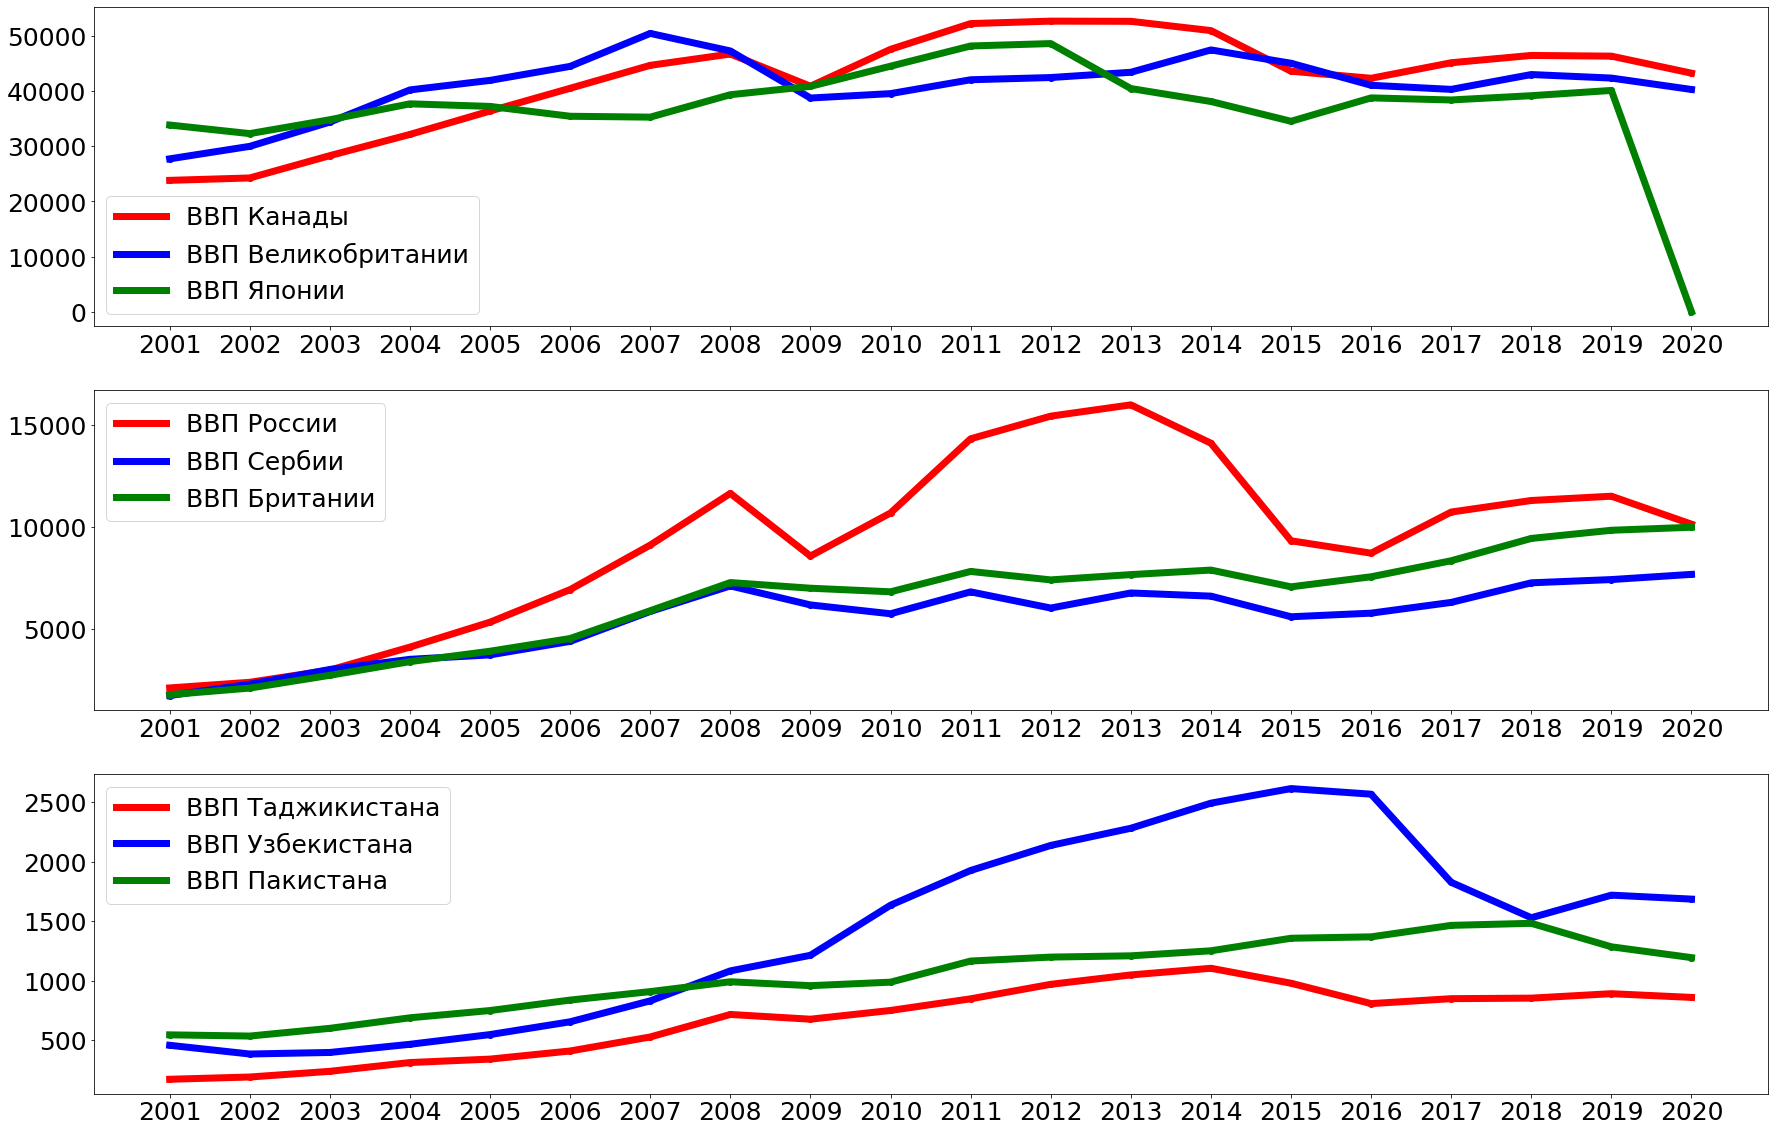

In [22]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(30)
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 25}
plt.rc('font', **font)


def painting(a: int, y1: str, y2: str, y3: str, x0: str, x1: str, x2: str):
    """
    Функция принимает расположение, легенду графика и страны, которые будут передаваться в функцию creating 
    """
    plt.subplot(a)
    plt.plot('year', 'count', data = creating(x0), linestyle='-', marker='o', label=y1,linewidth=7.0, color = "r")
    plt.plot('year', 'count', data = creating(x1), linestyle='-', marker='o', label=y2,linewidth=7.0, color = "b")
    plt.plot('year', 'count', data = creating(x2), linestyle='-', marker='o', label=y3,linewidth=7.0, color = "g")
    leg = plt.legend()
    
    
painting(311, "ВВП Канады", "ВВП Великобритании", "ВВП Японии", x0, x1, x2)
painting(312, "ВВП России", "ВВП Сербии", "ВВП Британии", x3, x4, x5)
painting(313, "ВВП Таджикистана", "ВВП Узбекистана", "ВВП Пакистана", x6, x7, x8)
plt.show()

## Построить столбчатую диаграмму для сравнения значения ВВП на душу населения в Великобритании, Японии, Канаде и России за 2015-2020 гг.
Создадим новую таблицу, где будут данные по Канаде

In [23]:
a = "Canada"
df3 = df1.query("country_name == @a")

Удалим лишние столбцы и заменим индекс для удобстав работы

In [24]:
x = [int(i) for i in range(18)]
df3  = df3.drop(df.columns[[x]], axis=1)
df3.index = [1]

/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Создадим новую таблицу, заполним столбцы **'money'** и **"country"**, в первый из которых запишем среднее значение ВВП в указанный период, а во второй страну. Я беру среднее значение, т.к. если посмотреть на существующие столбчатые диаграммы ВВП различных стран, везде взят либо какой-то конкретный год, либо среднее. (https://svspb.net/danmark/vvp-stran-na-dushu-naselenija.php?ysclid=l8ugrftxjm441239572)Если же записать данные за 6 лет по 4 страны, то это будет очень непонятно.

In [25]:
df4 = pd.DataFrame()
df4['money'] = df3.sum(axis=1)/6
df4["country"] = [a]
df4.head()

,money,country
1,37244.666,Canada


Теперь повторим, то же самое с помощью функции **"filling"**

In [26]:
def filling(a: str, x: list, counter: int):
    """ Функция принимает на вход название страны, список номеров столбцов, которые стоит удалить для 
    удобства дальнейших преобразований и индекс строки, которая добавиться в таблицу df4. В новую строку
    записывается название страны и среднее значение ВВП за имеющийся период времени
    """
    dfx = df1.query("country_name == @a")
    dfx = dfx.drop(df.columns[[x]], axis=1)
    dfx.index = [1]
    ans = float(dfx.sum(axis=1)/6)
    df4.loc[counter] = [ans, a]
    
    
x = [int(i) for i in range(18)]
a = "United Kingdom"
filling(a, x, 2)
a = "Japan"
filling(a, x, 3)
a = "Russian Federation"
filling(a, x, 4)
df4.head()

/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead 

,money,country
1,37244.666,Canada
2,34497.488,United Kingdom
3,26070.136,Japan
4,8722.826,Russian Federation


Построим столбчатую диаграмму по данным из таблицы df4

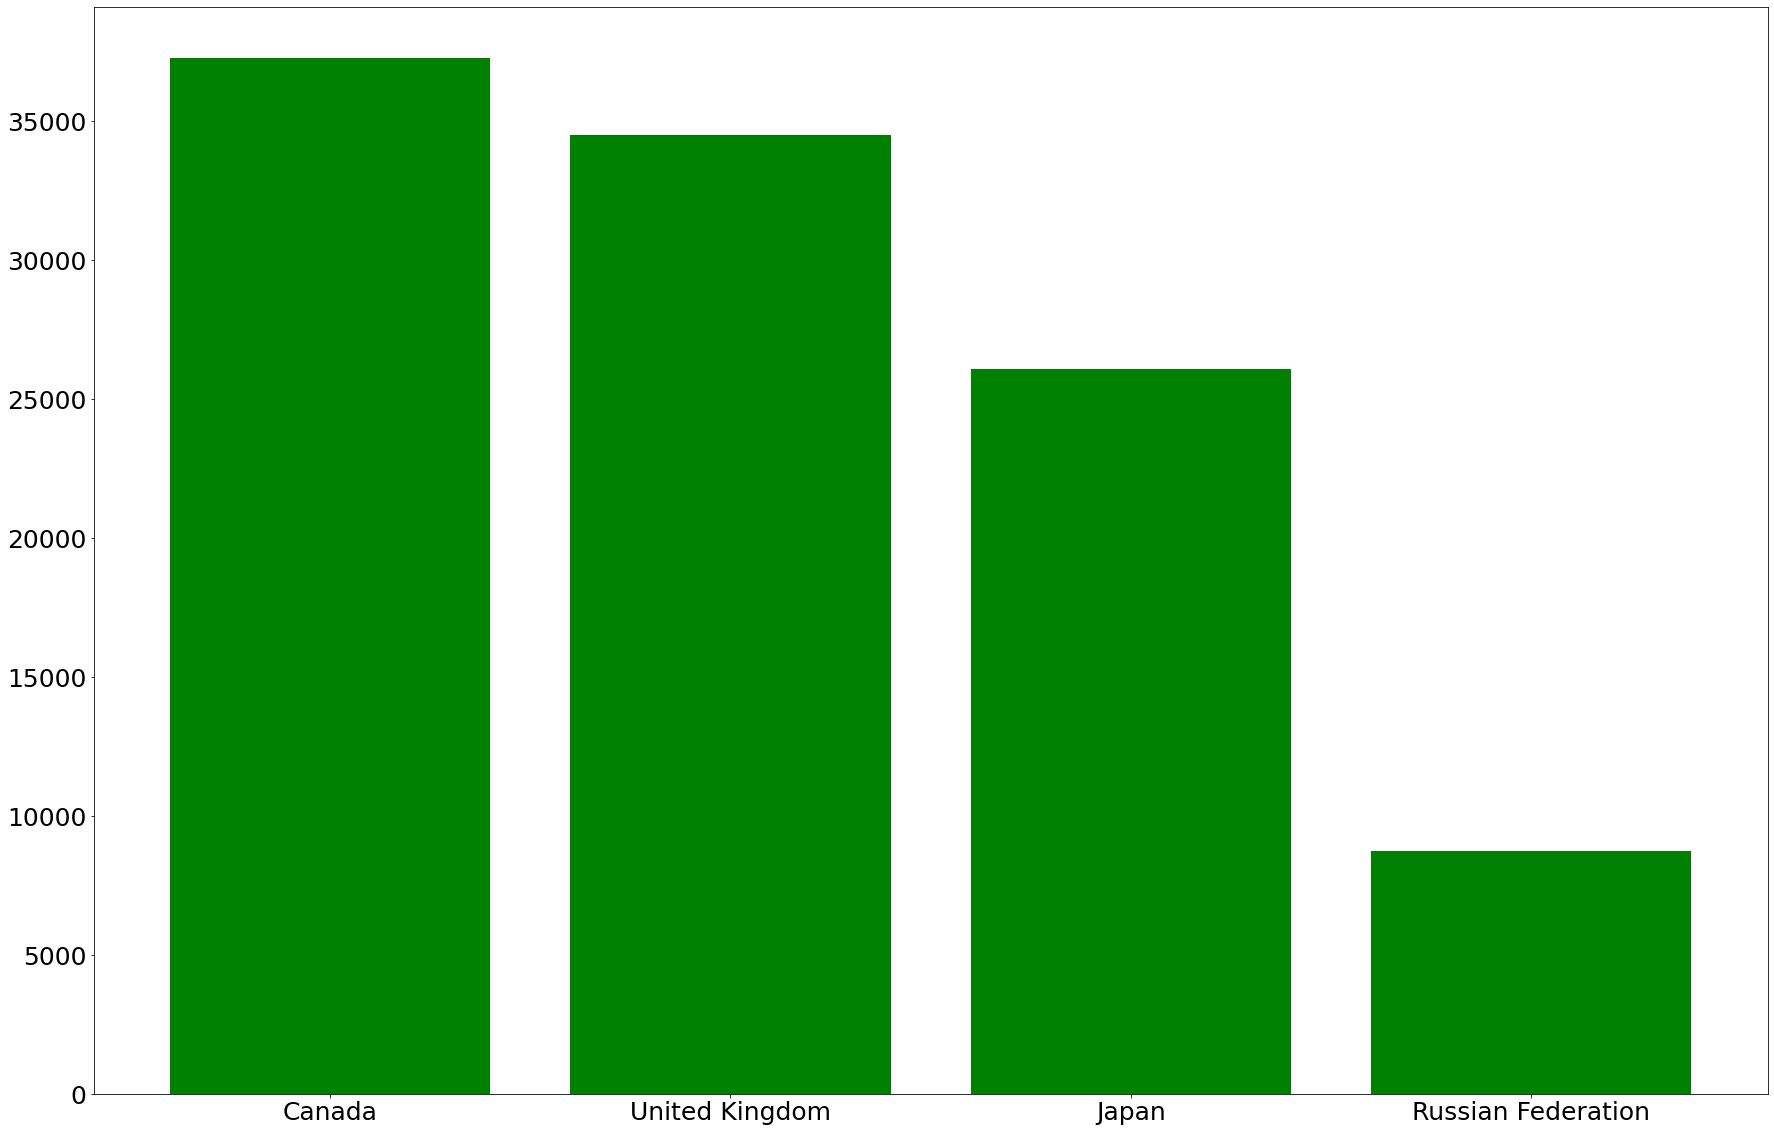

In [27]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(30)

height = df4["money"]
bars = df4["country"]
y_pos = np.arange(len(bars))

font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 25}
plt.rc('font', **font)


plt.bar(y_pos, height, color = "g")
plt.xticks(y_pos, bars)
plt.show()

## Построить круговую диаграмму соотношения численности населения государств Южной Америки по данным на 2020 год
Создадим таблицу, в которую запишем данные стран Южной Америки. Список этих стран можно найти в источнике https://ru.wikipedia.org/wiki/Список_государств_и_зависимых_территорий_Южной_Америки :
<br>
● Argentina
<br>
● Bolivia
<br>
● Brazil
<br>
● Venezuela, RB
<br>
● Guyana
<br>
● Colombia
<br>
● Paraguay
<br>
● Peru
<br>
● Suriname
<br>
● Uruguay
<br>
● Chile
<br>
● Ecuador

In [28]:
x1 = "Argentina"
x2 = "Bolivia"
x3 = "Brazil"
x4 = "Venezuela, RB"
x5 = "Guyana"
x6 = "Colombia"
x7 = "Paraguay"
x8 = "Peru"
x9 = "Suriname"
x10 = "Uruguay"
x11 = "Chile"
x12 = "Ecuador"

df5 = df_1.query('country_name == @x1 or country_name == @x2 or country_name == @x3 or country_name == @x4 or country_name == @x5 or country_name == @x6 or country_name == @x7 or country_name == @x8 or country_name == @x9 or country_name == @x10 or country_name == @x11 or country_name == @x12')
df5.head(12)

,country_name,indicator_name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
113,Argentina,"Population, total",36870796.000,37275644.000,37681743.000,38087866.000,38491970.000,38892924.000,39289876.000,39684303.000,...,41261490.000,41733271.000,42202935.000,42669500.000,43131966.000,43590368.000,44044811.000,44494502.000,44938712.000,45376763.000
145,Bolivia,"Population, total",8418270.000,8580244.000,8742822.000,8905820.000,9069044.000,9232301.000,9395449.000,9558438.000,...,10212951.000,10377677.000,10542375.000,10706517.000,10869732.000,11031822.000,11192853.000,11353140.000,11513102.000,11673029.000
151,Brazil,"Population, total",174790339.000,177196051.000,179537523.000,181809244.000,184006479.000,186127108.000,188167353.000,190130445.000,...,197514541.000,199287292.000,201035904.000,202763744.000,204471759.000,206163056.000,207833825.000,209469320.000,211049519.000,212559409.000
179,Chile,"Population, total",15342350.000,15516112.000,15684413.000,15849649.000,16014972.000,16182713.000,16354507.000,16530201.000,...,17233584.000,17400359.000,17571511.000,17758969.000,17969356.000,18209072.000,18470435.000,18729166.000,18952035.000,19116209.000
183,Colombia,"Population, total",39629965.000,40255956.000,40875363.000,41483872.000,42075953.000,42647731.000,43200901.000,43737512.000,...,45662747.000,46075721.000,46495492.000,46967706.000,47520667.000,48175048.000,48909844.000,49661056.000,50339443.000,50882884.000
213,Ecuador,"Population, total",12681123.000,12914660.000,13143465.000,13369678.000,13596390.000,13825839.000,14059379.000,14296554.000,...,15243885.000,15474099.000,15707473.000,15951832.000,16212022.000,16491116.000,16785356.000,17084359.000,17373657.000,17643060.000
265,Guyana,"Population, total",746718.000,745206.000,744789.000,745142.000,745737.000,746156.000,746335.000,746477.000,...,752029.000,755388.000,759281.000,763371.000,767433.000,771363.000,775218.000,779007.000,782775.000,786559.000
405,Paraguay,"Population, total",5323202.000,5428442.000,5531958.000,5632983.000,5730556.000,5824095.000,5913212.000,5998430.000,...,6333981.000,6421510.000,6510273.000,6599524.000,6688746.000,6777878.000,6867058.000,6956069.000,7044639.000,7132530.000
407,Peru,"Population, total",26459944.000,26799289.000,27100964.000,27372217.000,27624226.000,27866140.000,28102055.000,28333050.000,...,29264314.000,29506790.000,29773986.000,30090372.000,30470739.000,30926036.000,31444299.000,31989265.000,32510462.000,32971846.000
471,Suriname,"Population, total",470944.000,476574.000,482228.000,487938.000,493680.000,499461.000,505292.000,511181.000,...,535177.000,541247.000,547295.000,553278.000,559136.000,564883.000,570501.000,575987.000,581363.000,586634.000


Удалим все лишние столбцы для удобства дальнейших действий

In [29]:
x = [int(i) for i in range(1,22)]
df5 = df5.drop(df.columns[[x]], axis=1)
df5.head(12)

/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,country_name,2020
113,Argentina,45376763.000
145,Bolivia,11673029.000
151,Brazil,212559409.000
179,Chile,19116209.000
183,Colombia,50882884.000
213,Ecuador,17643060.000
265,Guyana,786559.000
405,Paraguay,7132530.000
407,Peru,32971846.000
471,Suriname,586634.000


Построим круговую диаграмму по данным из таблицы **df5**

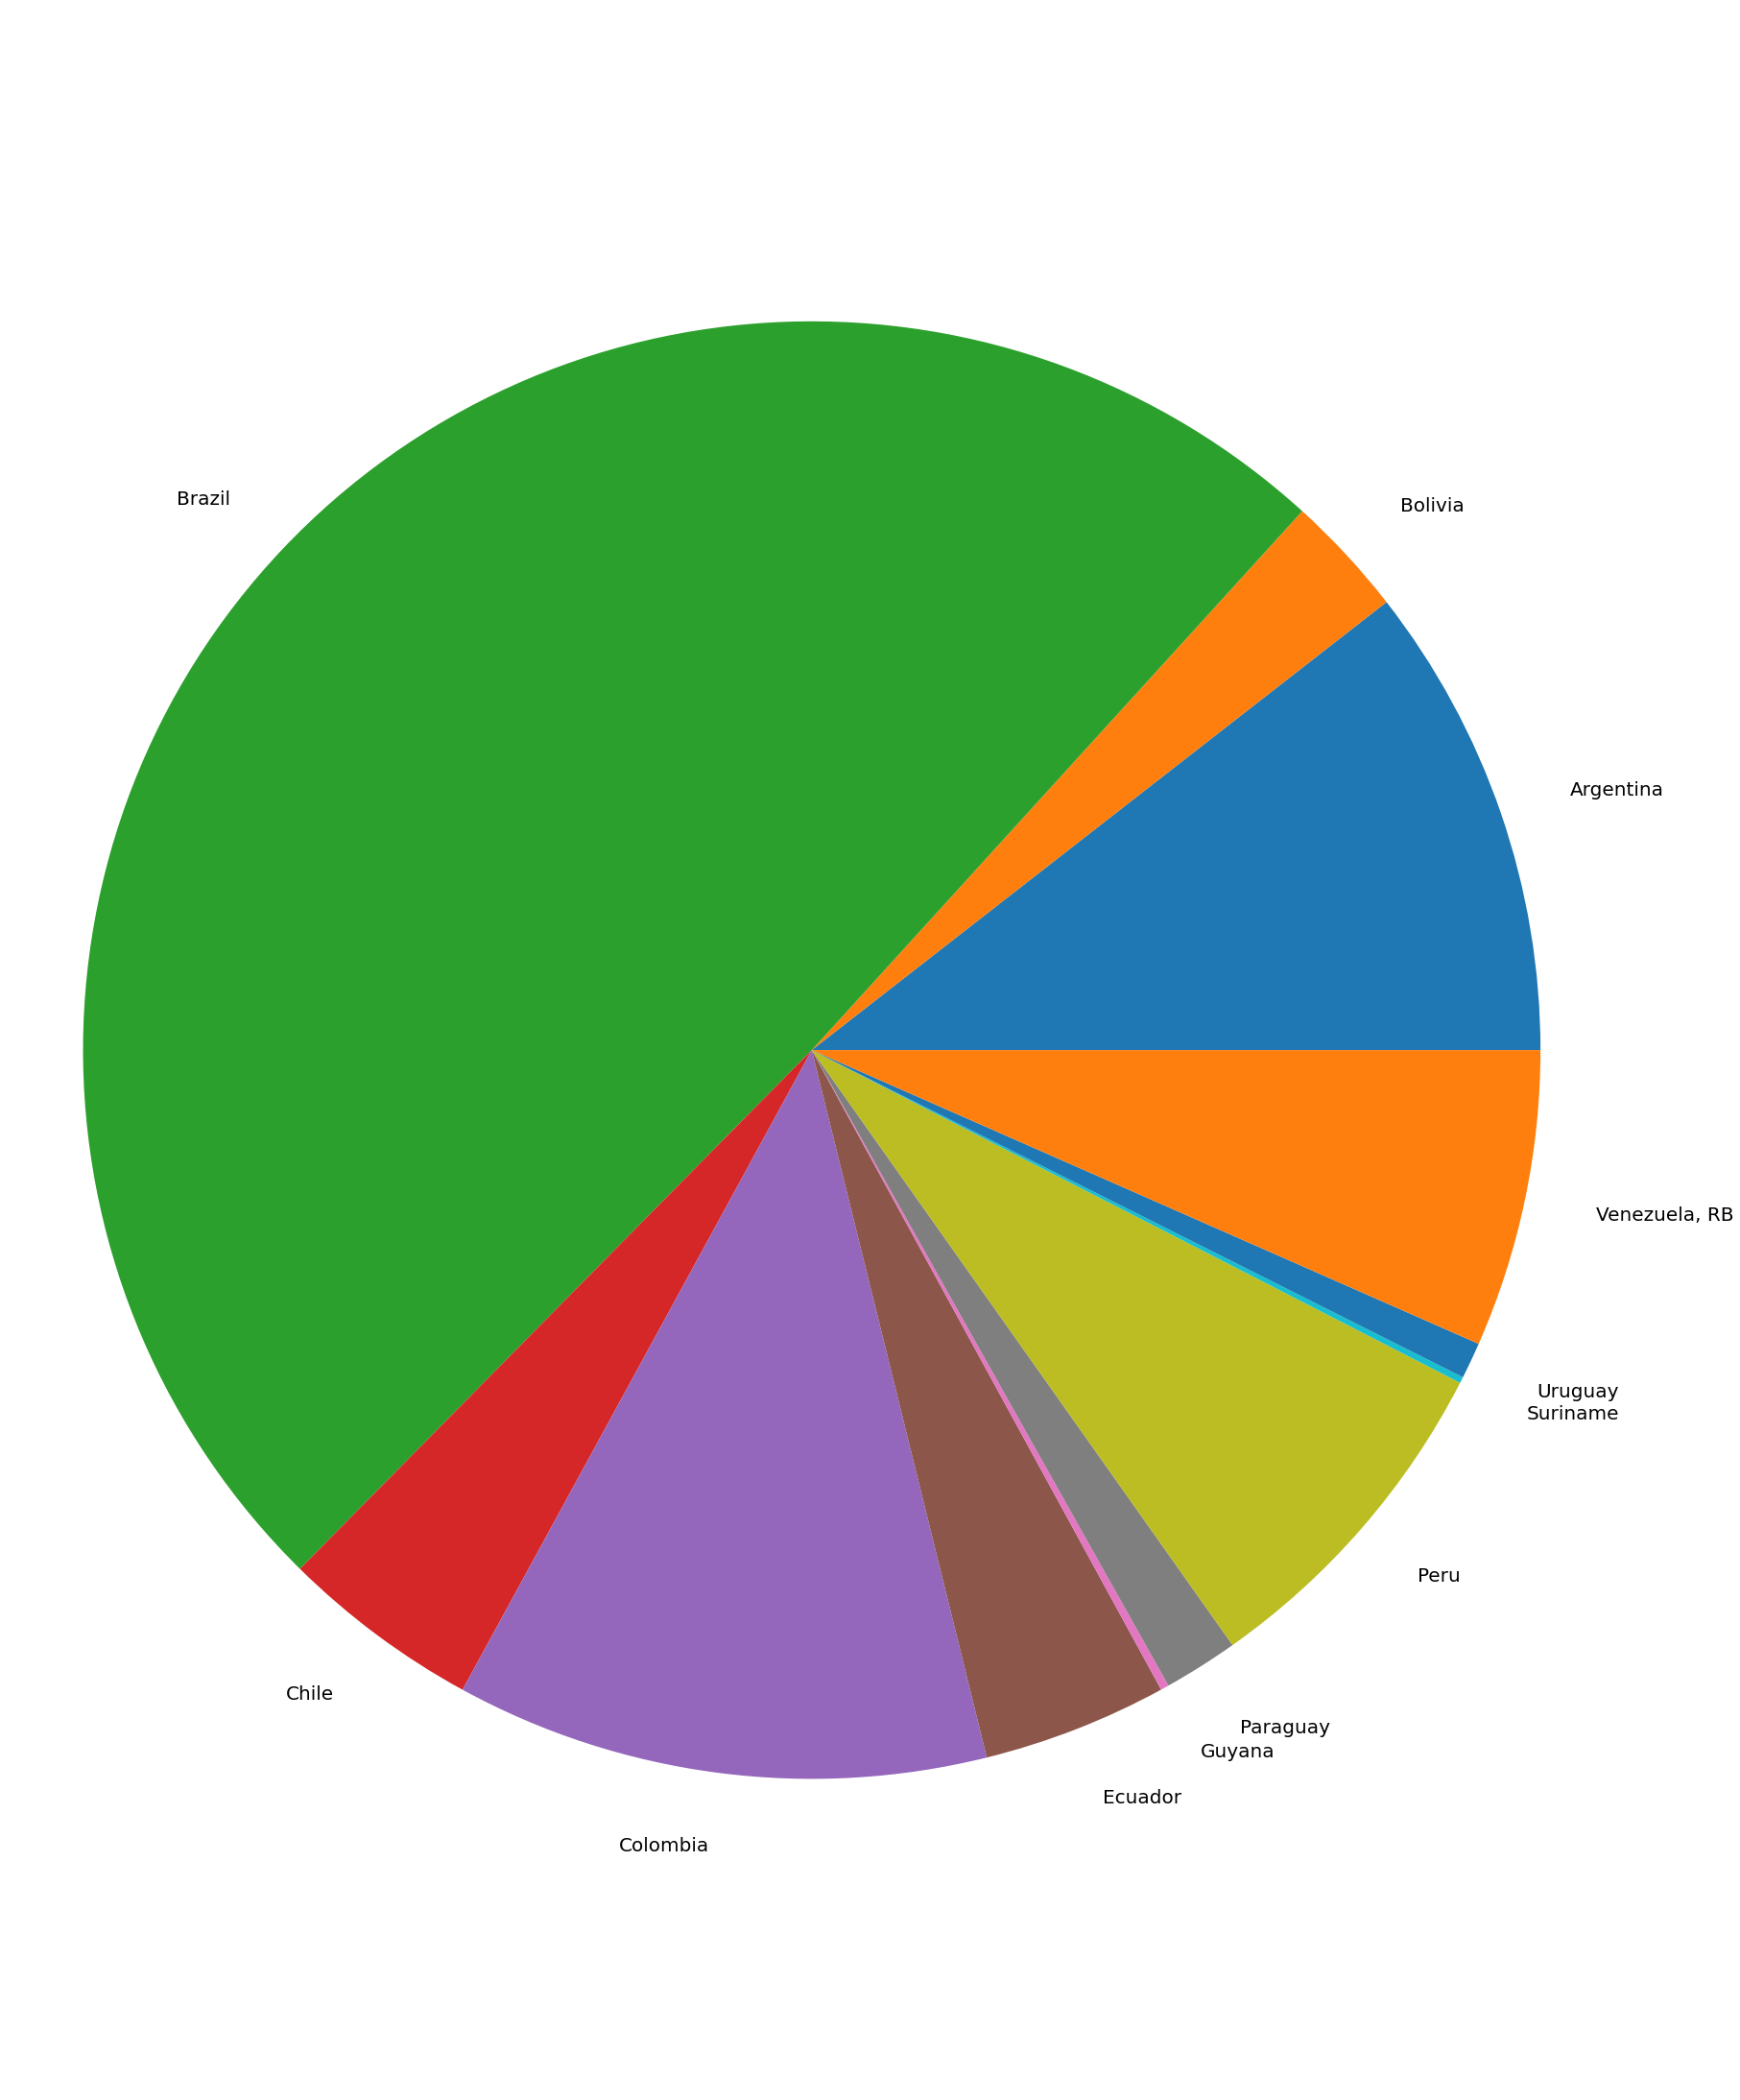

In [30]:
size_of_groups= df5["2020"]
labels = df5["country_name"]
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 20}
plt.rc('font', **font)

fig = plt.figure()
fig.set_figheight(40)
fig.set_figwidth(30)

plt.pie(size_of_groups, labels=labels)
plt.axis('equal')  
plt.show()

## Вывод
Итак, в процессе моей работы, я провела обзор, предобработку и анализ данных, ответив на все 4 поставленных задачи. Обзор данных был классическим, там присутствовала проверка типов данных, общее количество столбцов и строк и т.п. Предобработка включала в себя замену пропусков на значение 0, чтобы потом не было проблем с обработкой данных типа Nan. Также я заменила заголовки столбцов на заголовки в стиле **snake_case**. Помимо этого я удалила все ненужные столбцы. Еще я разбила имеющиеся данные на 2 таблицы. Сам анализ был разделен на задачи. В основном я использовала сводные таблицы для их решения. С их помощью я выбирала нужные значения из всех имеющихся, и соспоставляла с выбранным параметром. По итогу я получала таблицу, в столбцах которой хранились значения для построения графиков и диаграмм. Таким образом мне удалось познакомиться с двумя типами диаграмм и одним типом графика. Я научилась создавать Столбчатую и круговую диаграмму, а также строить график. Я также попробовала различные методы при работе с графиками: я изменяла толщину линий, добавляла легенду графика, поработала с подписямию изменим их толщину и размер. Еще я научилась отображать на одном графике сразу несколько значений, для удобства покрасив их в разные цвета.